In [3]:
library(tidyverse)

Warning message:
“package ‘tidyverse’ was built under R version 4.3.3”
Warning message:
“package ‘ggplot2’ was built under R version 4.3.3”


Warning message:
“package ‘tibble’ was built under R version 4.3.3”
Warning message:
“package ‘tidyr’ was built under R version 4.3.2”
Warning message:
“package ‘readr’ was built under R version 4.3.3”
Warning message:
“package ‘purrr’ was built under R version 4.3.3”
Warning message:
“package ‘dplyr’ was built under R version 4.3.2”
Warning message:
“package ‘stringr’ was built under R version 4.3.3”
Warning message:
“package ‘forcats’ was built under R version 4.3.3”
Warning message:
“package ‘lubridate’ was built under R version 4.3.3”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.2     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<ht

In [4]:
.libPaths()
# '/r1/people/lei_huang/.conda/envs/huanglei/lib/R/library'

[1] "/r1/people/lei_huang/.conda/envs/huanglei/lib/R/library"

In [5]:
library(cowplot)

Warning message:
“package ‘cowplot’ was built under R version 4.3.2”

Attaching package: ‘cowplot’


The following object is masked from ‘package:lubridate’:

    stamp




In [6]:
# previously use "/mnt/archgen/public_data/HGDP+1KG_callset/stats/POS.all_filtered.1240K/config.EUR_ind_HGDP.txt"


need to optimize
get_ind_pop_table <- function(pop)
{
    return(data.frame(ind=read.table(paste0("pop_list/", pop, ".txt"), header = FALSE, sep = "\t", comment.char = "#")[[1]], pop=pop))
}

do.call(get_ind_pop_table, list("Adygei", "Basque", "French", "Italian", "Orcadian", "Russian", "Sardinian", "Tuscan", "England_CNE", "England_WBI"))


In [7]:
EUR_ind <- data.frame()
for (pop in c("Adygei", "Basque", "French", "Italian", "Orcadian", "Russian", "Sardinian", "Tuscan", "England_CNE", "England_WBI"))
{
    ind <- read.table(paste0("pop_list/", pop, ".txt"), header = FALSE, sep = "\t", comment.char = "#")[[1]]
    EUR_ind <- EUR_ind %>% rbind(data.frame(ind=ind, pop=pop))
}

In [8]:
f_table <- read.table("/mnt/archgen/users/lei_huang/RAS_tools/RAS_empirical/result/f3_nonmissing.EUR_ind.EUR.ascertained.txt", header = TRUE, sep = "\t", comment.char = "#") %>% filter(max_freq==0.02) %>% left_join(EUR_ind, by=join_by(pop_left1==ind))

f_table_FIN_IBS <- full_join(f_table %>% filter(pop_right1=="FIN"), f_table %>% filter(pop_right1=="IBS"), by=join_by("min_freq"=="min_freq", "max_freq"=="max_freq", "asc_outgroup"=="asc_outgroup", "pop_left1"=="pop_left1", "Nr_blocks"=="Nr_blocks", "pop"=="pop"))

f_table_FIN_IBS_HGDP <- f_table_FIN_IBS %>% filter(! pop %in% c("England_CNE", "England_WBI"))
f_table_FIN_IBS_Eng <- f_table_FIN_IBS %>% filter(pop %in% c("England_CNE", "England_WBI"))

plot_asc_2 <- ggplot() +
geom_point(data = f_table_FIN_IBS_HGDP, mapping = aes(x = f_value.x, y = f_value.y, color=pop), size=0.2, alpha=0.5) +
geom_point(data = f_table_FIN_IBS_Eng, mapping = aes(x = f_value.x, y = f_value.y, shape=factor(pop)), size=0.5) +
scale_shape_manual(values=c(15,0)) +
geom_errorbar(data = f_table_FIN_IBS_HGDP, mapping = aes(x = f_value.x, y = f_value.y, color=pop, xmin = f_value.x - std.x, xmax = f_value.x + std.x), linewidth=0.1, alpha=0.5) + 
geom_errorbar(data = f_table_FIN_IBS_HGDP, mapping = aes(x = f_value.x, y = f_value.y, color=pop, ymin = f_value.y - std.y, ymax = f_value.y + std.y), linewidth=0.1, alpha=0.5) + 
geom_errorbar(data = f_table_FIN_IBS_Eng, mapping = aes(x = f_value.x, y = f_value.y, xmin = f_value.x - std.x, xmax = f_value.x + std.x), linewidth=0.1) + 
geom_errorbar(data = f_table_FIN_IBS_Eng, mapping = aes(x = f_value.x, y = f_value.y, ymin = f_value.y - std.y, ymax = f_value.y + std.y), linewidth=0.1) + 
geom_abline(intercept = 0, slope = 1, linetype="dashed", linewidth=0.1) +
coord_fixed() +
xlab(bquote(italic(RAS)*"(EUR_ind; FIN)")) +
ylab(bquote(italic(RAS)*"(EUR_ind; IBS)")) +
#labs(color = "HGDP_EUR_ind", shape = "England_ind") +
guides(
      color = guide_legend(
      title = NULL,
      barwidth = 0,
      barheight = 0,
      ncol = 2, 
      byrow = TRUE,
      theme = theme(legend.text=element_text(face="bold", size=5), legend.background = element_rect(fill = alpha("grey", 0.2))),
    ),
    shape = guide_legend(
      title = NULL,
      barwidth = 0,
      barheight = 0,
      ncol = 1,
      byrow = TRUE,
      theme = theme(legend.text=element_text(face="bold", size=5), legend.background = element_rect(fill = alpha("grey", 0.4))),
    )) +
theme(panel.background=element_blank(),
    axis.title.x=element_text(face="bold", size=7, angle=0),
    axis.title.y=element_text(face="bold", size=7, angle=90),
    axis.text.x=element_text(face="bold", size=5, vjust=0.5, angle=0),
    axis.text.y=element_text(face="bold", size=5, hjust=0.5, angle=90),
    axis.line=element_line(colour ="black", linewidth=0.5),
    
    legend.position="inside",
    legend.position.inside  = c(0.77,0.65),
    #legend.background = element_blank(),
    
    legend.box.margin = margin(0,0,0,0,unit="cm"), legend.box.spacing= unit(0, 'cm'),  legend.spacing.y = unit(0.1, 'cm')
    )
    

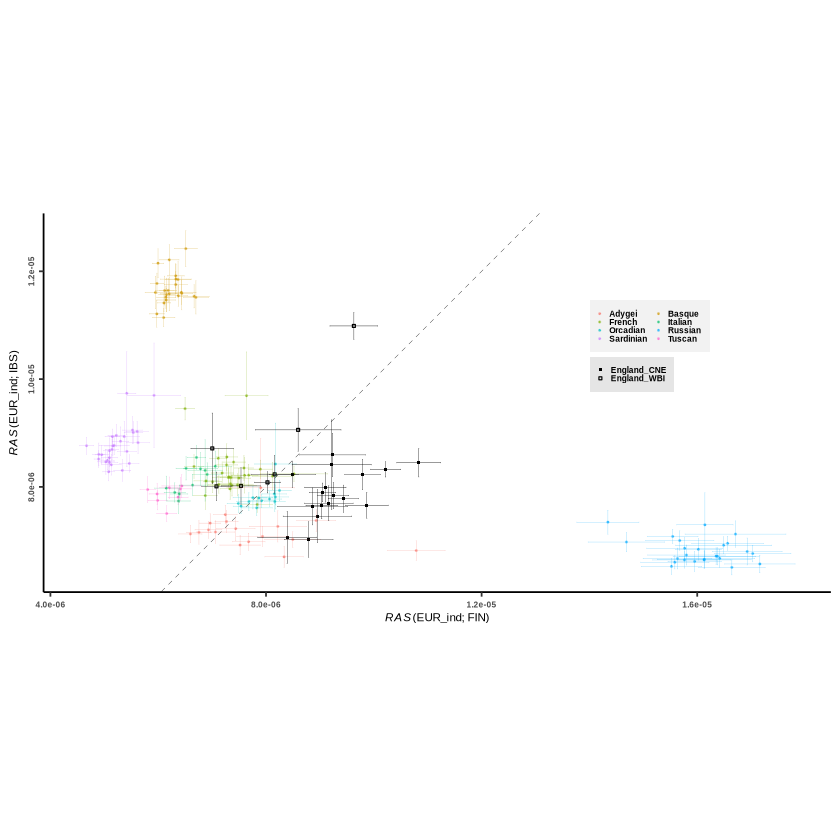

In [9]:
plot_asc_2

In [10]:
f_table <- read.table("/mnt/archgen/users/lei_huang/RAS_tools/RAS_empirical/result/f3_nonmissing.EUR_ind.EUR.all_sites.txt", header = TRUE, sep = "\t", comment.char = "#") %>% left_join(EUR_ind, by=join_by(pop_left1==ind))

f_table_FIN_IBS <- full_join(f_table %>% filter(pop_right1=="FIN"), f_table %>% filter(pop_right1=="IBS"), by=join_by("asc_outgroup"=="asc_outgroup", "pop_left1"=="pop_left1", "Nr_blocks"=="Nr_blocks", "pop"=="pop"))

f_table_FIN_IBS_HGDP <- f_table_FIN_IBS %>% filter(! pop %in% c("England_CNE", "England_WBI"))
f_table_FIN_IBS_Eng <- f_table_FIN_IBS %>% filter(pop %in% c("England_CNE", "England_WBI"))

plot_allsites <- ggplot() +
geom_point(data = f_table_FIN_IBS_HGDP, mapping = aes(x = f_value.x, y = f_value.y, color=pop), size=0.2, alpha=0.5) +
geom_point(data = f_table_FIN_IBS_Eng, mapping = aes(x = f_value.x, y = f_value.y, shape=factor(pop)), size=0.5) +
scale_shape_manual(values=c(15,0)) +
geom_errorbar(data = f_table_FIN_IBS_HGDP, mapping = aes(x = f_value.x, y = f_value.y, color=pop, xmin = f_value.x - std.x, xmax = f_value.x + std.x), linewidth=0.1, alpha=0.5) + 
geom_errorbar(data = f_table_FIN_IBS_HGDP, mapping = aes(x = f_value.x, y = f_value.y, color=pop, ymin = f_value.y - std.y, ymax = f_value.y + std.y), linewidth=0.1, alpha=0.5) + 
geom_errorbar(data = f_table_FIN_IBS_Eng, mapping = aes(x = f_value.x, y = f_value.y, xmin = f_value.x - std.x, xmax = f_value.x + std.x), linewidth=0.1) + 
geom_errorbar(data = f_table_FIN_IBS_Eng, mapping = aes(x = f_value.x, y = f_value.y, ymin = f_value.y - std.y, ymax = f_value.y + std.y), linewidth=0.1) + 
geom_abline(intercept = 0, slope = 1, linetype="dashed", linewidth=0.1) +
coord_fixed() +
scale_x_continuous(breaks=seq(0.0025, 0.0027, 0.0001)) +
scale_y_continuous(breaks=seq(0.0025, 0.0027, 0.0001)) +
xlab(bquote(italic(F)[3]*"(EUR_ind; FIN)")) +
ylab(bquote(italic(F)[3]*"(EUR_ind; IBS)")) +
labs(color = "HGDP_EUR_pop") +
theme(panel.background=element_blank(),
    #panel.grid=element_line(colour ="gray", linewidth=0.1),
    axis.title.x=element_text(face="bold", size=7, angle=0),
    axis.title.y=element_text(face="bold", size=7, angle=90),
    axis.text.x=element_text(face="bold", size=5, vjust=0.5, angle=0),
    axis.text.y=element_text(face="bold", size=5, hjust=0.5, angle=90),
    axis.line=element_line(colour ="black", linewidth=0.5),
    legend.position="none"
    )


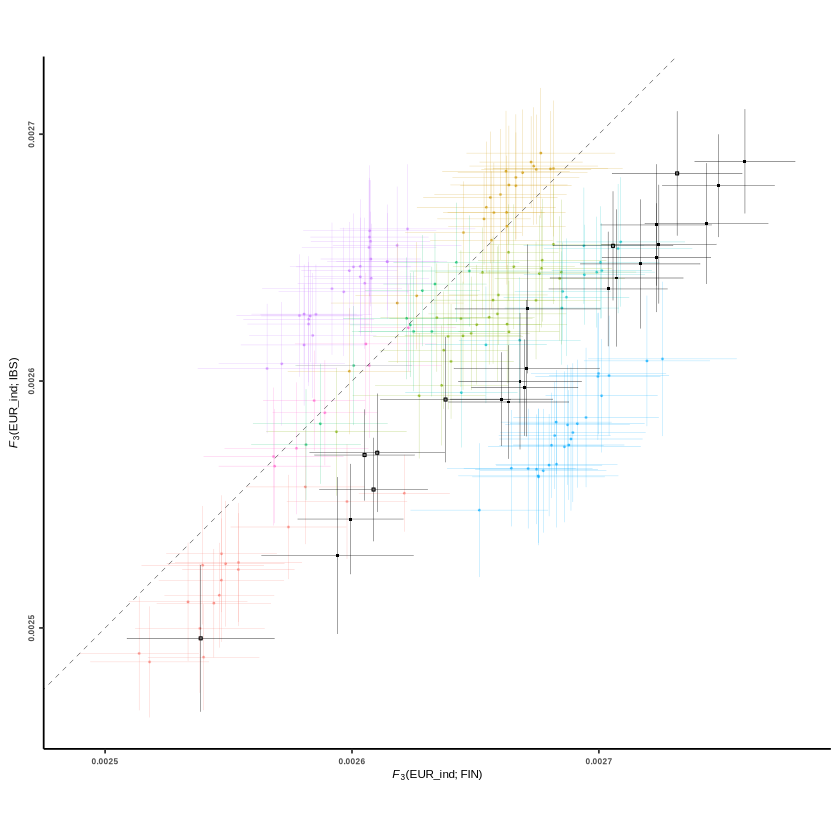

In [11]:
plot_allsites

In [12]:
f_table <- read.table("/mnt/archgen/users/lei_huang/RAS_tools/RAS_empirical/result/f3_nonmissing.EUR_ind.EUR.1240K.txt", header = TRUE, sep = "\t", comment.char = "#") %>% left_join(EUR_ind, by=join_by(pop_left1==ind))

f_table_FIN_IBS <- full_join(f_table %>% filter(pop_right1=="FIN"), f_table %>% filter(pop_right1=="IBS"), by=join_by("asc_outgroup"=="asc_outgroup", "pop_left1"=="pop_left1", "Nr_blocks"=="Nr_blocks", "pop"=="pop"))

f_table_FIN_IBS_HGDP <- f_table_FIN_IBS %>% filter(! pop %in% c("England_CNE", "England_WBI"))
f_table_FIN_IBS_Eng <- f_table_FIN_IBS %>% filter(pop %in% c("England_CNE", "England_WBI"))

plot_1240K <- ggplot() +
geom_point(data = f_table_FIN_IBS_HGDP, mapping = aes(x = f_value.x, y = f_value.y, color=pop), size=0.2, alpha=0.5) +
geom_point(data = f_table_FIN_IBS_Eng, mapping = aes(x = f_value.x, y = f_value.y, shape=factor(pop)), size=0.5) +
scale_shape_manual(values=c(15,0)) +
geom_errorbar(data = f_table_FIN_IBS_HGDP, mapping = aes(x = f_value.x, y = f_value.y, color=pop, xmin = f_value.x - std.x, xmax = f_value.x + std.x), linewidth=0.1, alpha=0.5) + 
geom_errorbar(data = f_table_FIN_IBS_HGDP, mapping = aes(x = f_value.x, y = f_value.y, color=pop, ymin = f_value.y - std.y, ymax = f_value.y + std.y), linewidth=0.1, alpha=0.5) + 
geom_errorbar(data = f_table_FIN_IBS_Eng, mapping = aes(x = f_value.x, y = f_value.y, xmin = f_value.x - std.x, xmax = f_value.x + std.x), linewidth=0.1) + 
geom_errorbar(data = f_table_FIN_IBS_Eng, mapping = aes(x = f_value.x, y = f_value.y, ymin = f_value.y - std.y, ymax = f_value.y + std.y), linewidth=0.1) + 
geom_abline(intercept = 0, slope = 1, linetype="dashed", linewidth=0.1) +
coord_fixed() +
xlab(bquote(italic(F)[3]*"(EUR_ind; FIN)")) +
ylab(bquote(italic(F)[3]*"(EUR_ind; IBS)")) +
labs(color = "HGDP_EUR_pop") +
theme(panel.background=element_blank(),
    #panel.grid=element_line(colour ="gray", linewidth=0.1),
    axis.title.x=element_text(face="bold", size=7, angle=0),
    axis.title.y=element_text(face="bold", size=7, angle=90),
    axis.text.x=element_text(face="bold", size=5, vjust=0.5, angle=0),
    axis.text.y=element_text(face="bold", size=5, hjust=0.5, angle=90),
    axis.line=element_line(colour ="black", linewidth=0.5),
    legend.position="none"
    )


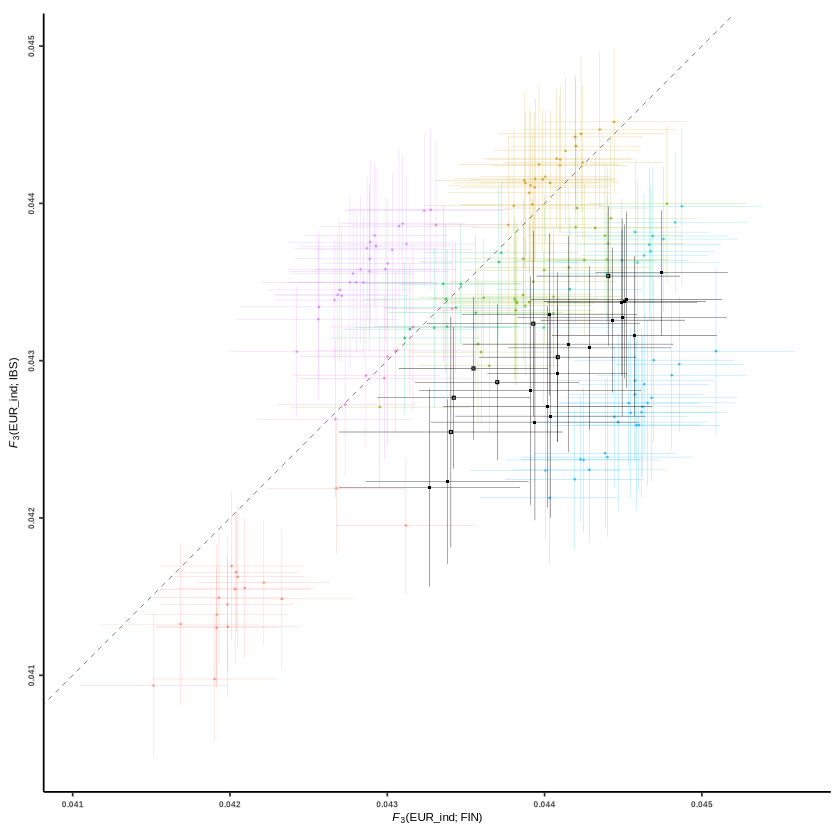

In [13]:
plot_1240K

In [14]:
# legend <- cowplot::get_plot_component(plot_asc + theme(legend.position = "bottom", legend.box = "horizontal", legend.box.margin = margin(0,0,0,0,unit="cm"), legend.box.spacing= unit(0, 'cm'),  legend.spacing.y = unit(0, 'cm')), "guide-box-bottom")

In [15]:
bottom_row <- cowplot::plot_grid(plot_allsites, plot_1240K, labels = c("B", "C"), align = "h", axis = "lrtb", vjust = 0.5)

In [16]:
# upper_row <- plot_grid(plot_asc, plot_1240K, nrow = 1, ncol = 2, rel_widths = c(0.65, 0.35))

In [17]:
# plot_RAS_empirical <- cowplot::plot_grid(upper_row, legend, nrow = 2, ncol = 1, rel_heights = c(0.85, 0.15))

In [18]:
# plot_RAS_empirical

In [19]:
# ggsave(plot_RAS_empirical, filename=paste0("plot_RAS_empirical.png"), limitsize=FALSE,  width=18, height=8, units="cm")

In [20]:
plot_RAS_empirical <- plot_grid(plot_asc_2, bottom_row, labels = c("A"), nrow = 2, ncol = 1, rel_heights = c(1, 1))

In [19]:
ggsave(plot_RAS_empirical, filename=paste0("plot_RAS_empirical.pdf"), limitsize=FALSE,  width=8, height=8, units="cm")